# Visualizing a trajectory

Let's make some figures to visualize the trajectory of a disc's flight path. Let's simulate a slow and a fast throw so that we can make comparisons.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from frispy.disc import Disc
%matplotlib inline
%matplotlib notebook
plt.rc("font", size=14, family="serif")

In [2]:
# Negative theta is an airbounce
disc1 = Disc(vx=20, theta=-0.05, phi=.5)
disc2 = Disc(vx=30, theta=-0.05, phi=.5)

In [3]:
result1, _ = disc1.compute_trajectory(flight_time=4)

In [4]:
result2, _ = disc2.compute_trajectory(flight_time=4)

<IPython.core.display.Javascript object>


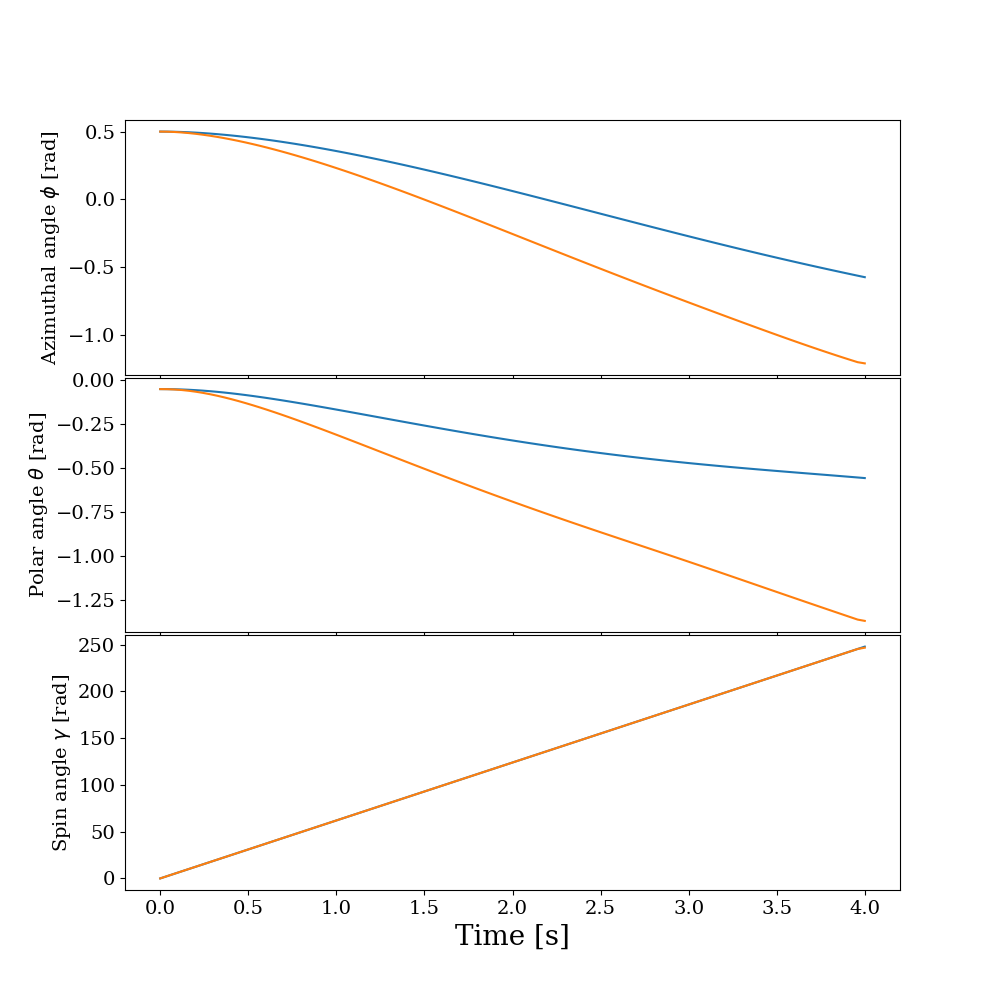

In [5]:
fig, ax = plt.subplots(ncols=1, nrows=3, sharex=True)
plt.subplots_adjust(hspace=0.01)

for res in [result1, result2]:
    ax[0].plot(res["times"], res["phi"])
    ax[1].plot(res["times"], res["theta"])
    ax[2].plot(res["times"], res["gamma"])

ax[0].set_ylabel(r"Azimuthal angle $\phi$ [rad]")
ax[1].set_ylabel(r"Polar angle $\theta$ [rad]")
ax[2].set_ylabel(r"Spin angle $\gamma$ [rad]")
ax[2].set_xlabel("Time [s]", size=20)

fig.set_size_inches(10, 10)

In [6]:
phi = result2["phi"][50]
theta = result2["theta"][50]
r = disc1.eom.rotation_matrix_from_phi_theta(phi, theta)
print(r)

[[ 0.76677647  0.16912348  0.61923428]
 [ 0.          0.96466829 -0.26346743]
 [-0.64191421  0.20202062  0.73968494]]


In [7]:
from matplotlib.tri import Triangulation
def get_edge(radii, n=20):
    alpha = np.linspace(0, 2*np.pi, n)
    r = radii * np.ones(n)
    x = r * np.cos(alpha)
    y = r * np.sin(alpha)
    z = np.zeros(n)
    return np.array([x, y, z]).T
edge = get_edge(disc2.eom.diameter / 2 * 10)
edge_T = edge @ r

<IPython.core.display.Javascript object>


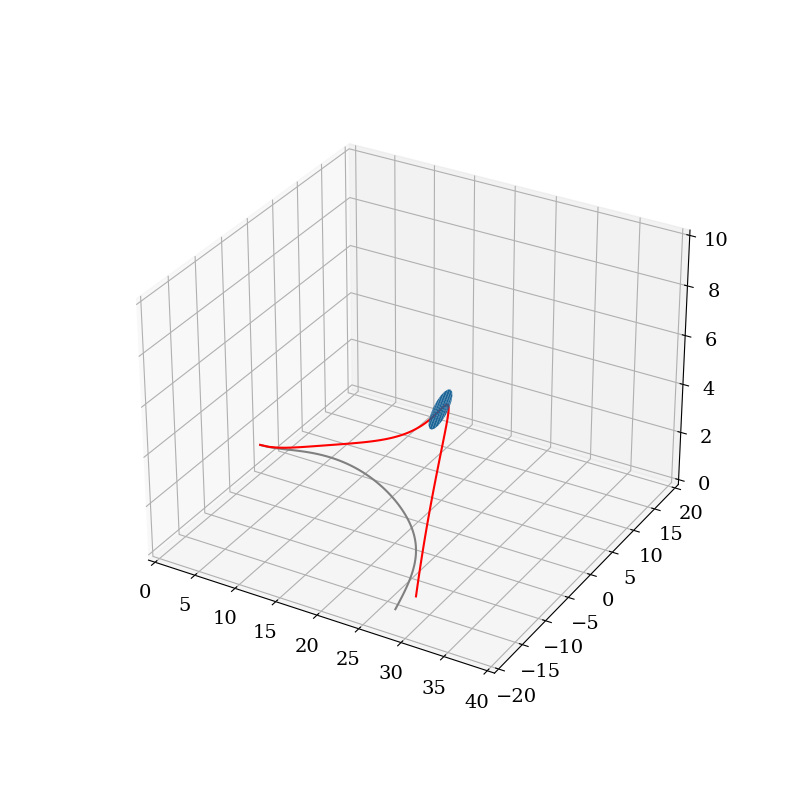

In [8]:
fig = plt.figure()
ax = fig.add_subplot(projection="3d")
ax.plot3D(result1["x"], result1["y"], result1["z"], "gray")
ax.plot3D(result2["x"], result2["y"], result2["z"], "red")

ax.plot_trisurf(edge_T[:, 0] + result2["x"][50], edge_T[:, 1] + result2["y"][50], edge_T[:, 2] + result2["z"][50])
ax.set_xlim(0, 40)
ax.set_ylim(-20, 20)
ax.set_zlim(0, 10)

fig.set_size_inches(8, 8)